In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [7]:
results = pd.read_csv('experiment_results.csv')
results = results[results['method'] != 'Louvain-igraph']
results.head()

,dataset,modification,percentage,method,metric,value
4,Dancer 01,random asc,0.0,Fastgreedy,P,8.000000
5,Dancer 01,random asc,0.0,Fastgreedy,P*/P,0.750000
6,Dancer 01,random asc,0.0,Fastgreedy,Modularity,0.640525
7,Dancer 01,random asc,0.0,Fastgreedy,NMI,0.759245
8,Dancer 01,random asc,0.0,Infomap,P,99.000000


In [8]:
results['dataset'].unique()

array(['Dancer 01', 'Dancer 03', 'Cora', 'Email EU'], dtype=object)

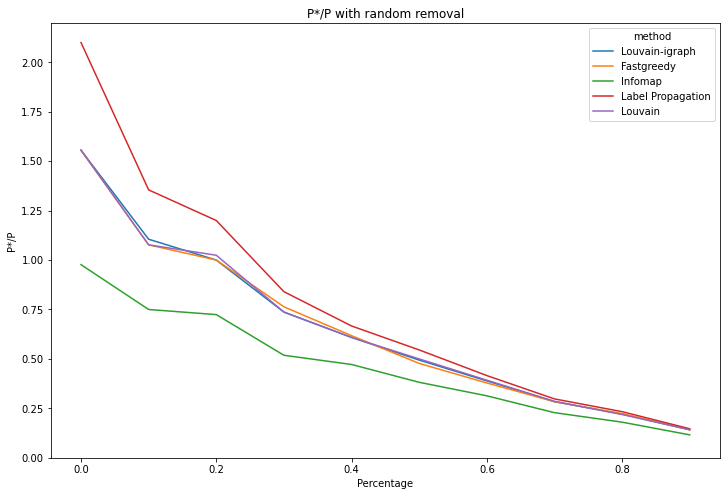

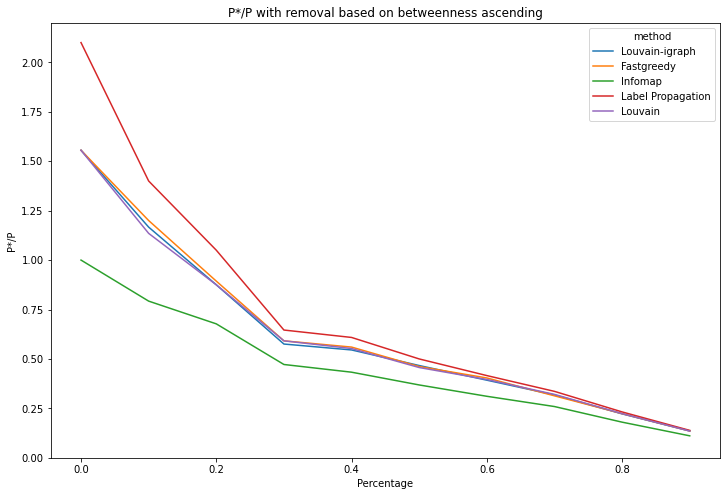

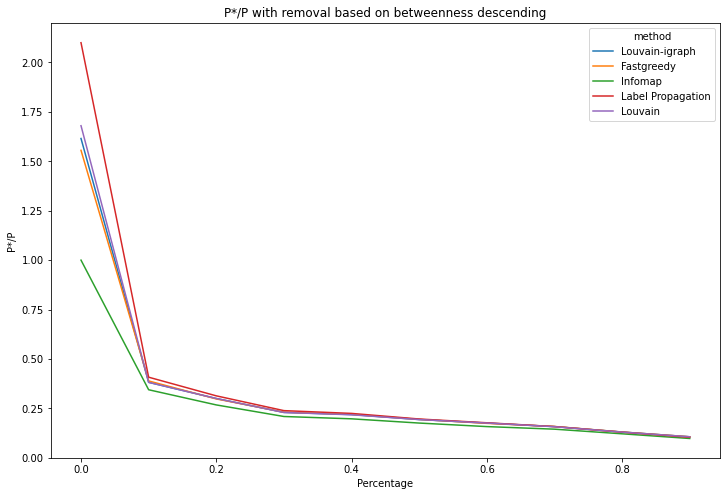

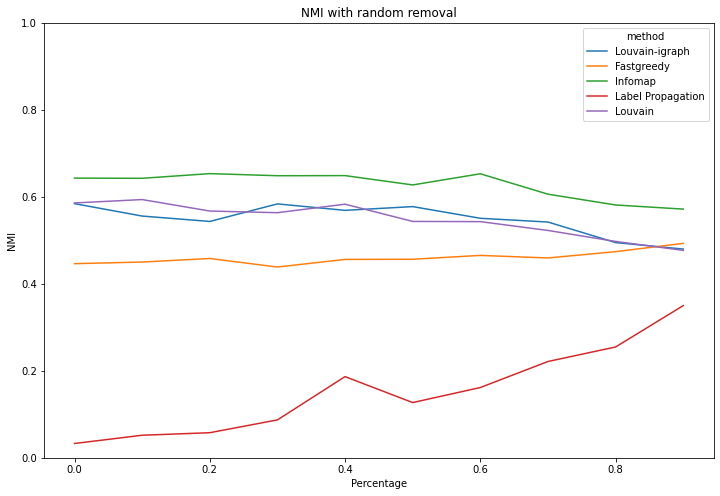

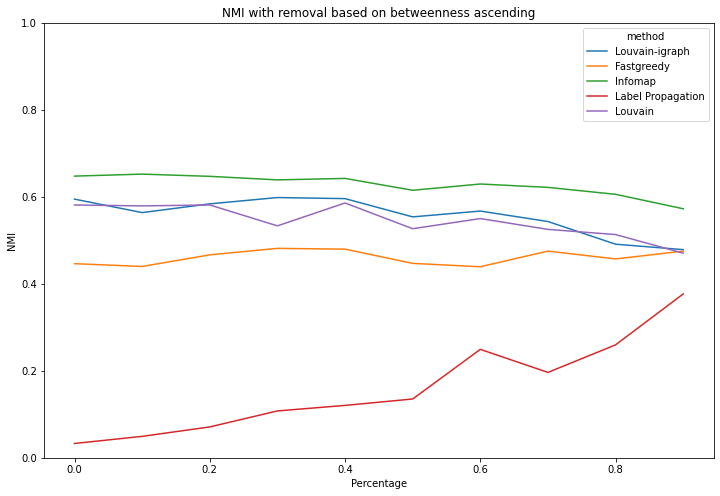

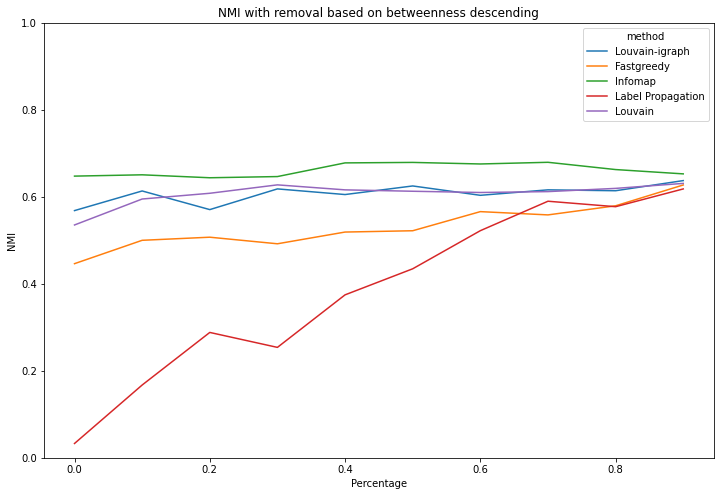

In [5]:
# This for cycle is for visualization only

for metric in ['P*/P','NMI']:
#for metric in metrics['metric'].unique():
    for modification in results['modification'].unique():
#        for dataset in metrics['dataset'].unique():
        for dataset in ['Email EU']:
            fig, ax = plt.subplots(ncols=1, figsize=(12,8))
            data = results[(results['metric'] == metric) &
                           (results['modification'] == modification) &
                           (results['dataset'] == dataset)]
            sns.lineplot(data=data, x='percentage', y='value', hue='method',ax=ax)
            
            ax.set_ylabel(metric)
            ax.set_xlabel('Percentage')
            
            if metric == 'NMI':
                ax.set_ybound(upper=1, lower=0)
            else:
                ax.set_ybound(lower=0)
            
            if modification == 'random asc':
                ax.set_title(metric+' with random removal')
            elif modification == 'betweenness asc':
                ax.set_title(metric+' with removal based on betweenness ascending')
            elif modification == 'betweenness desc':
                ax.set_title(metric+' with removal based on betweenness descending')

<ipython-input-12-a30faa86f1f0>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(ncols=1, figsize=(12,8))


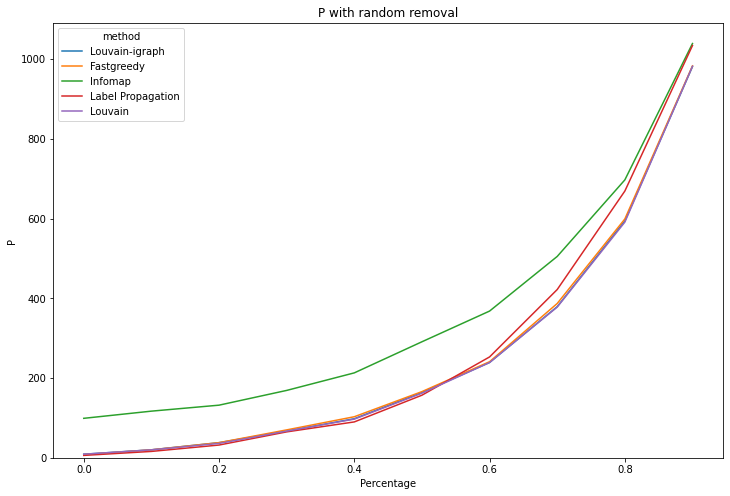

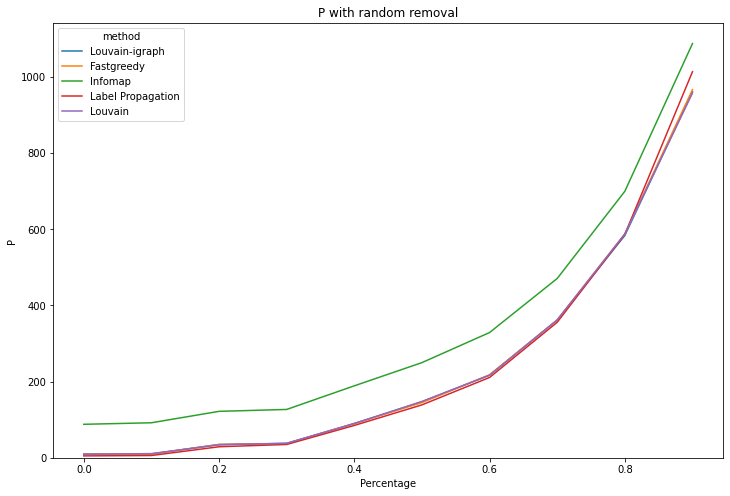

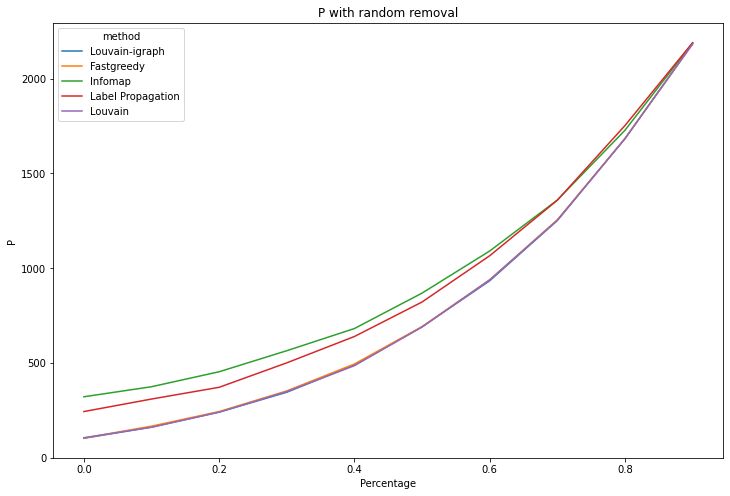

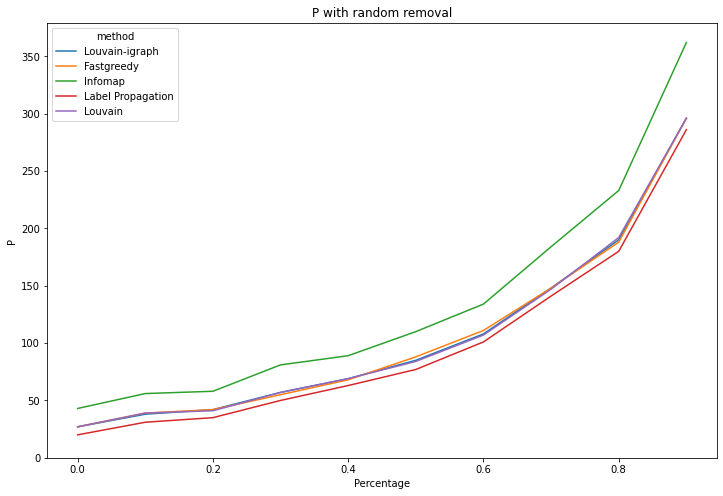

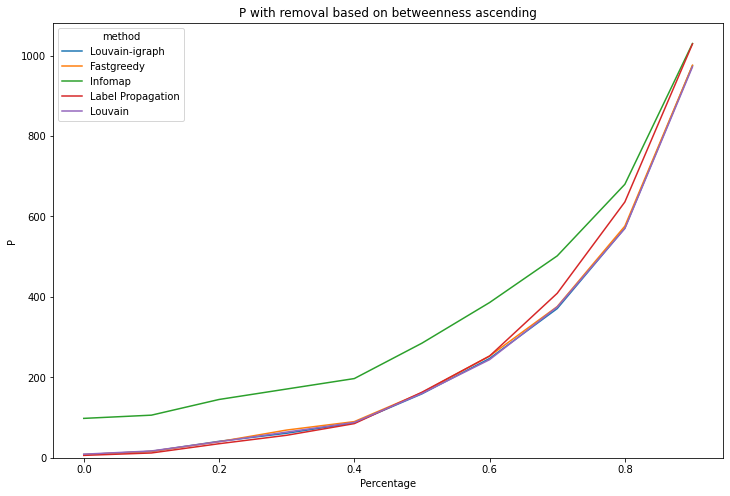

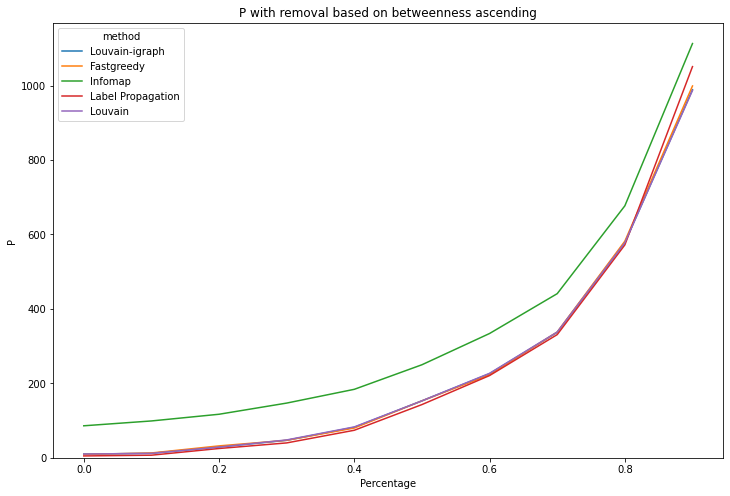

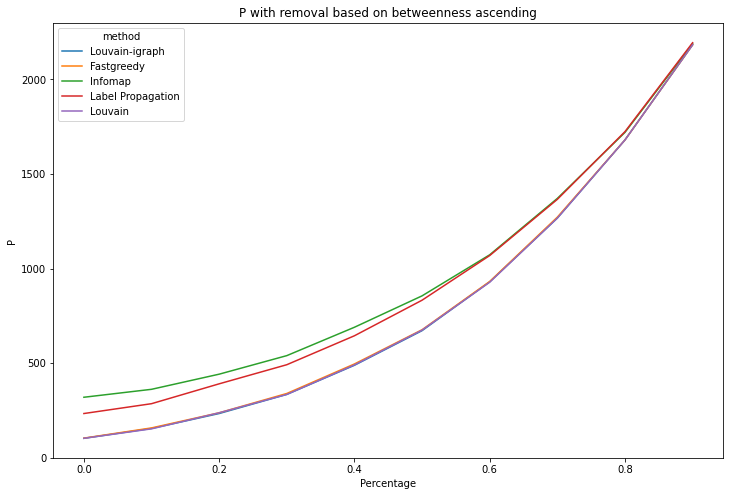

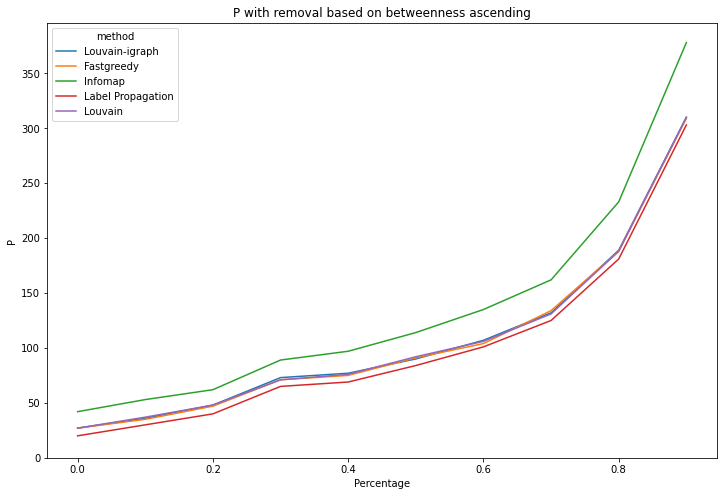

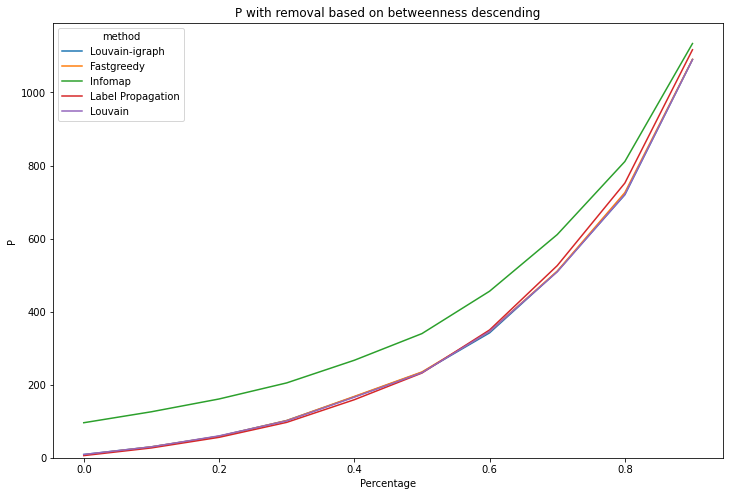

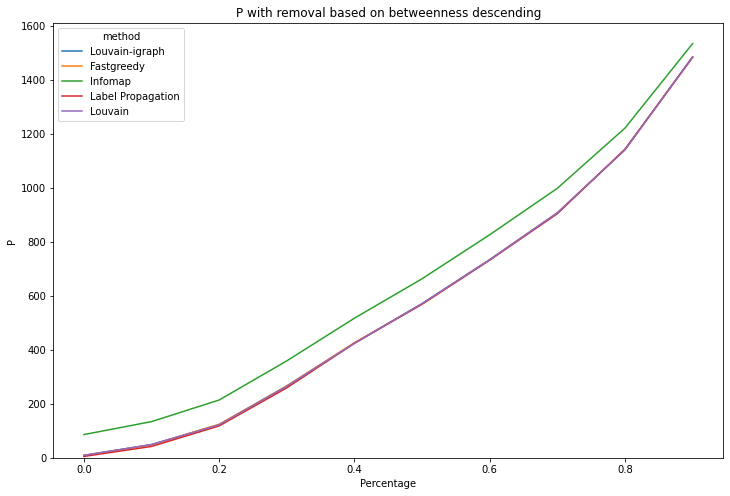

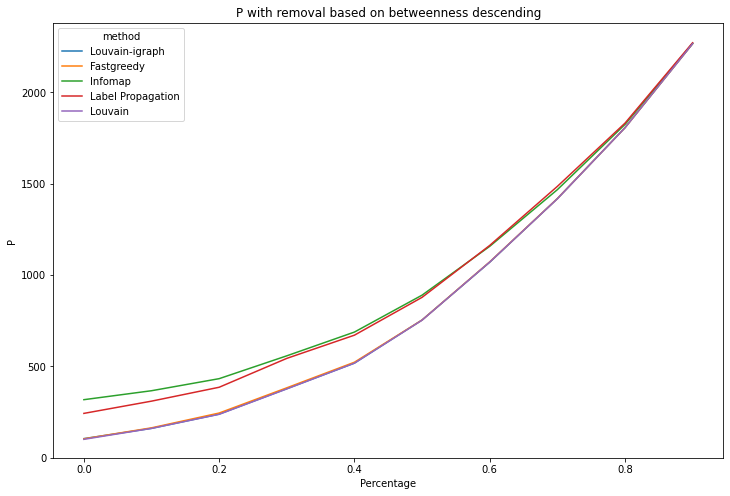

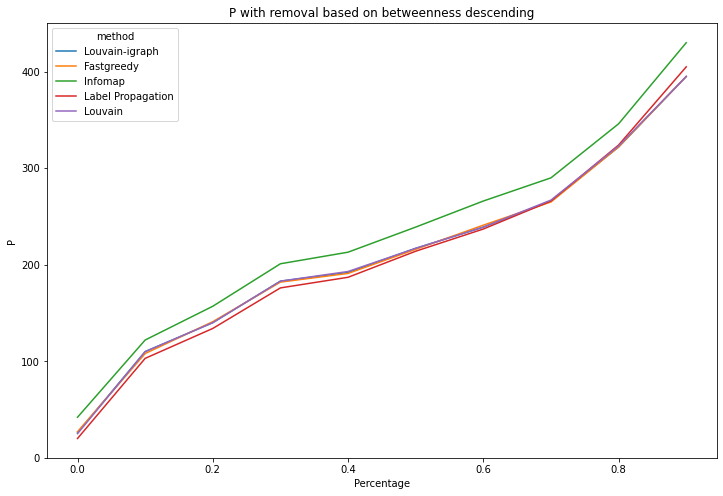

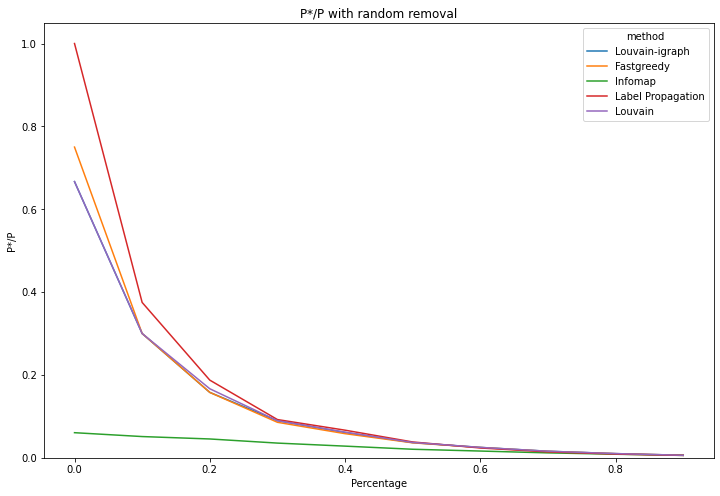

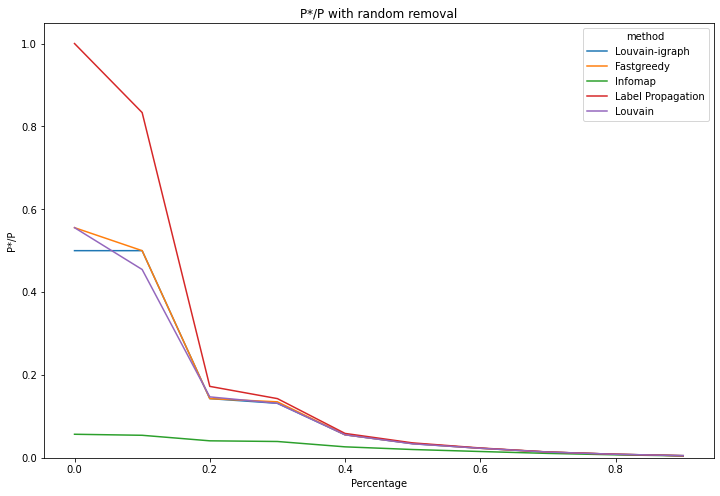

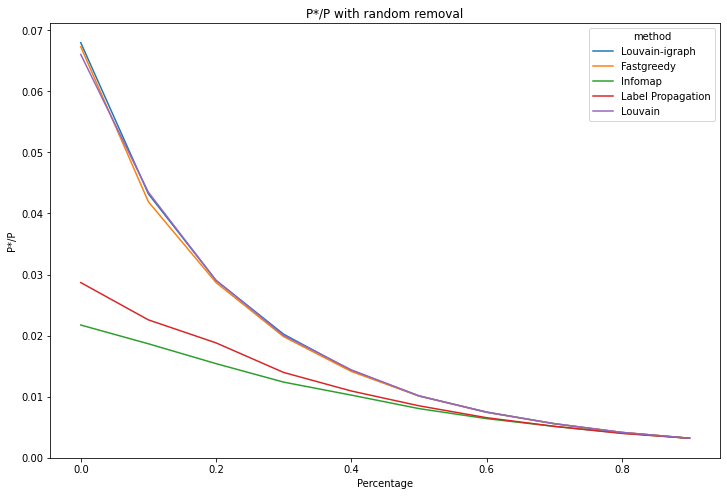

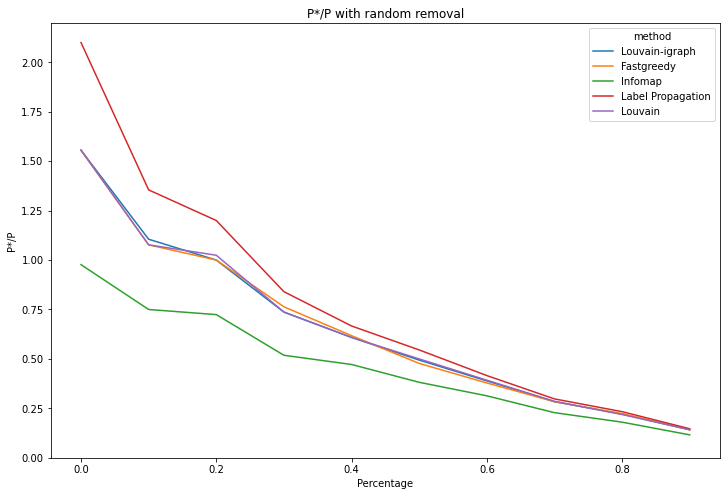

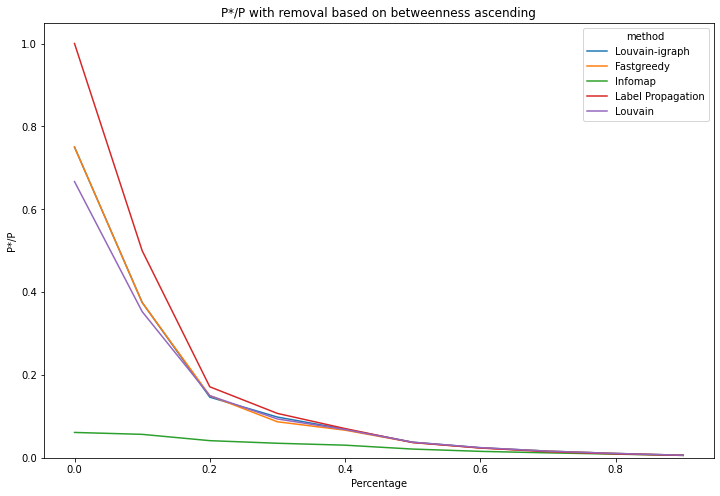

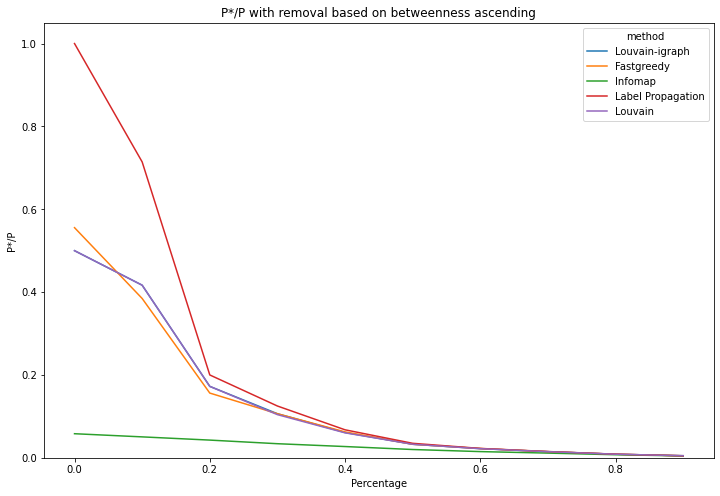

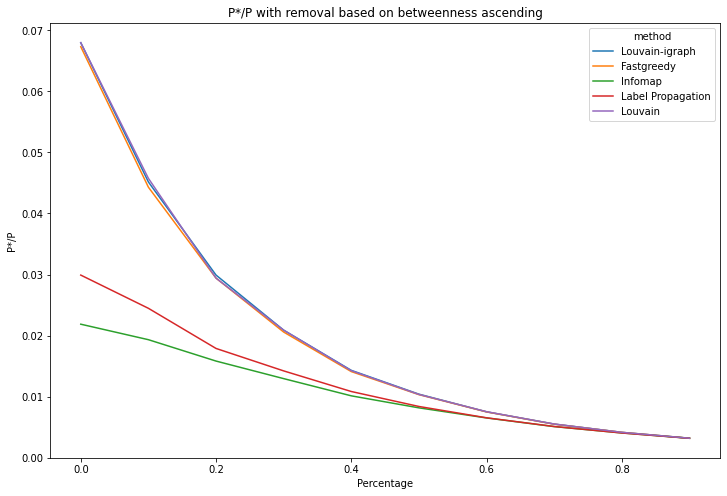

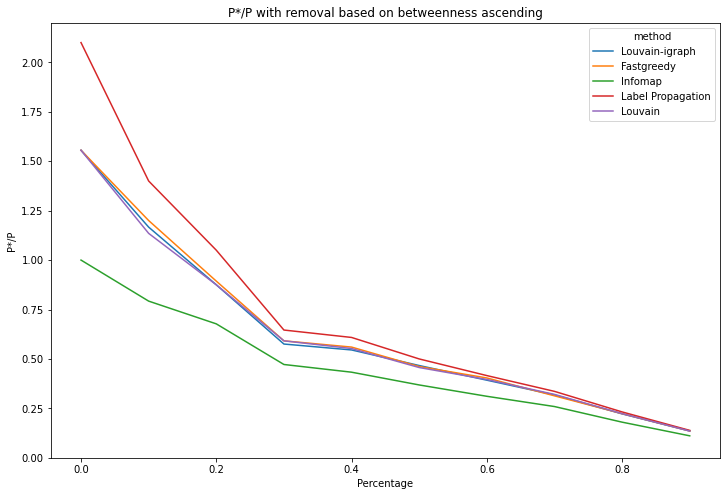

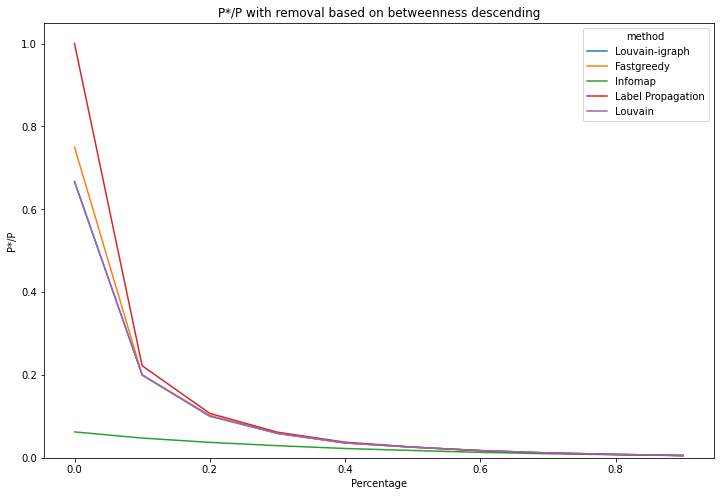

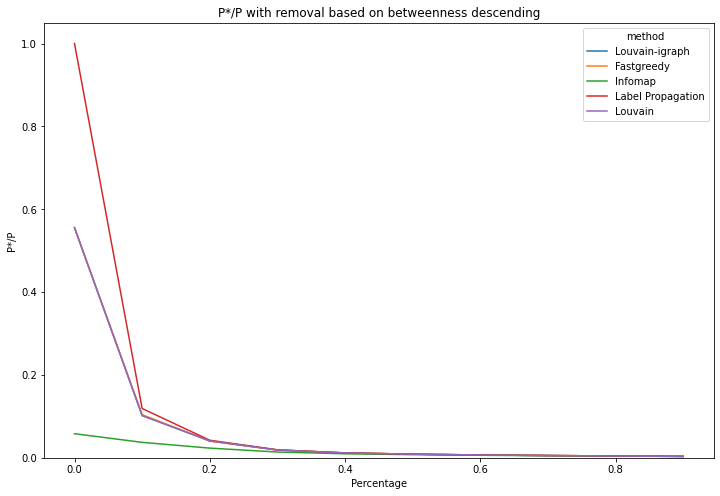

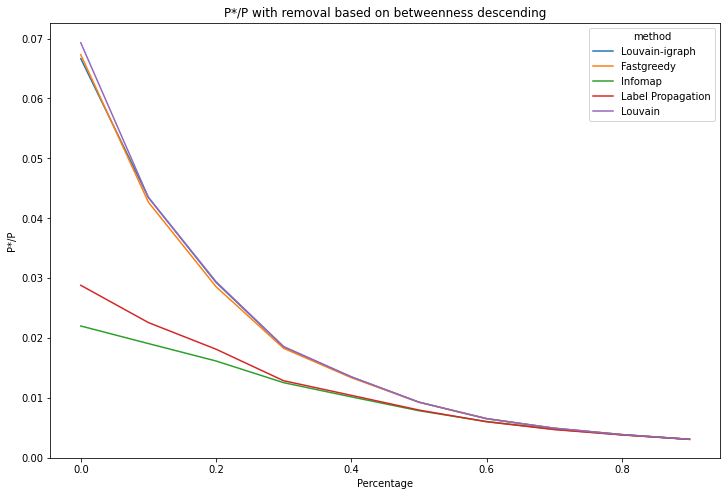

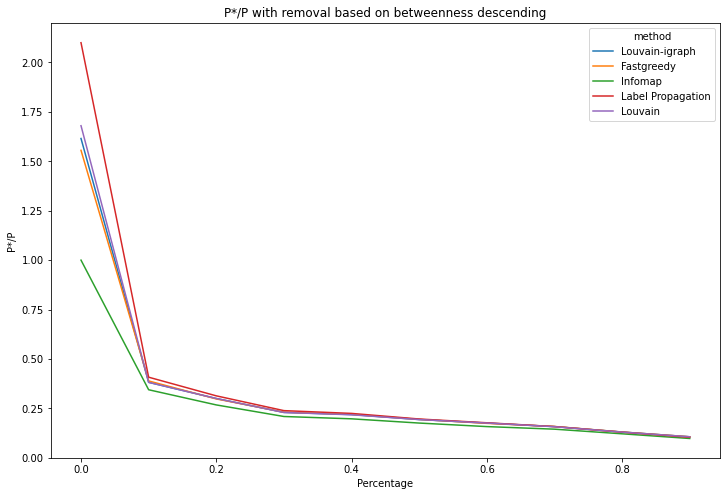

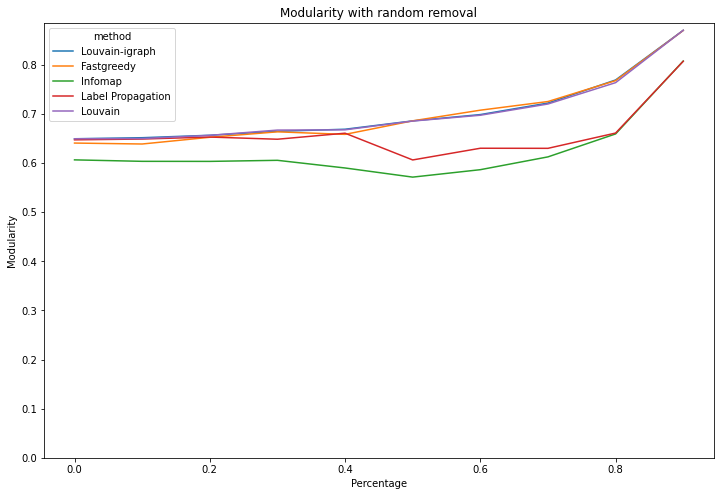

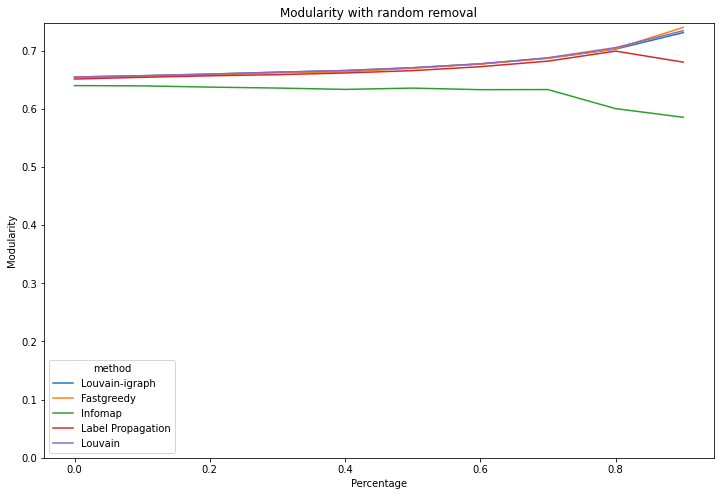

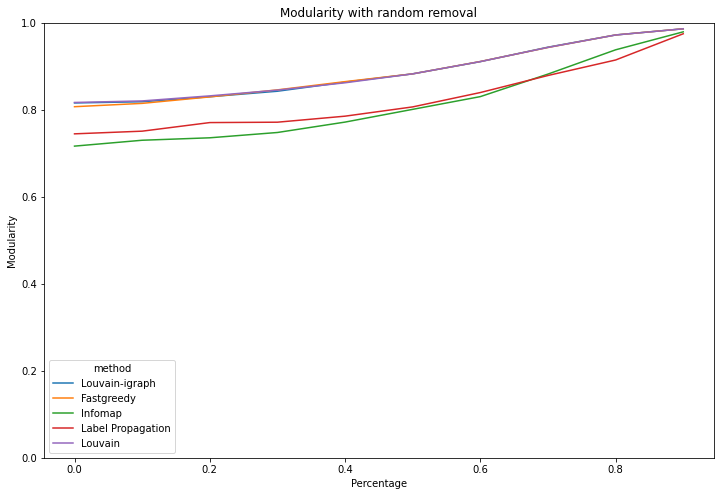

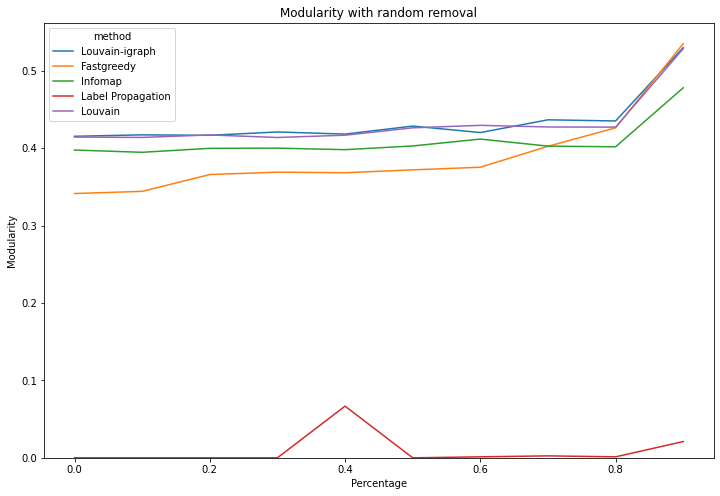

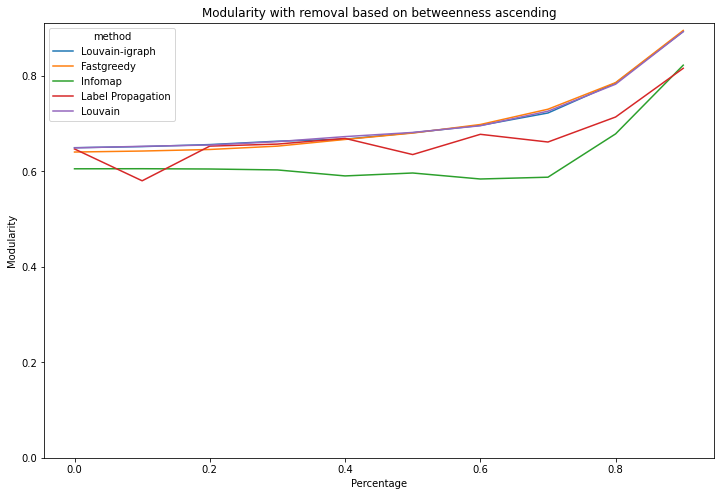

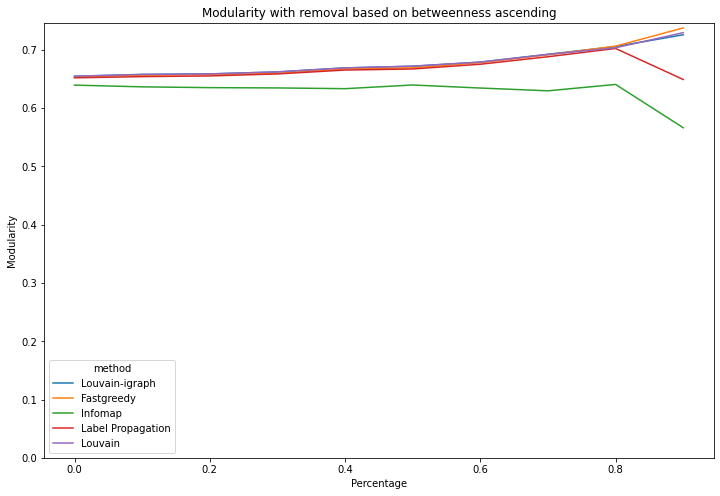

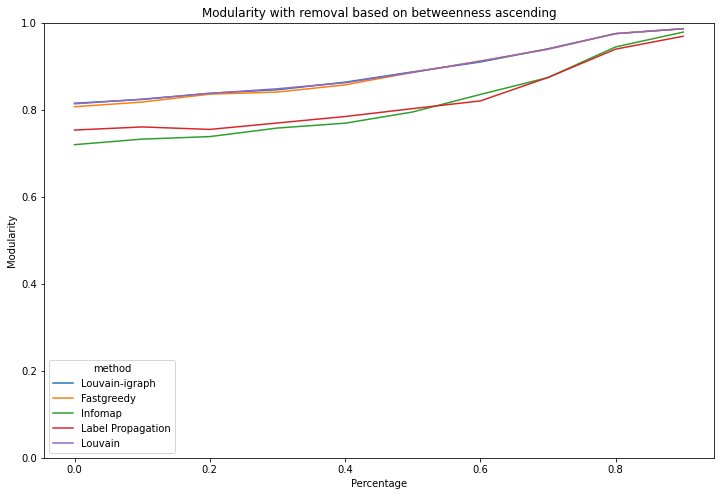

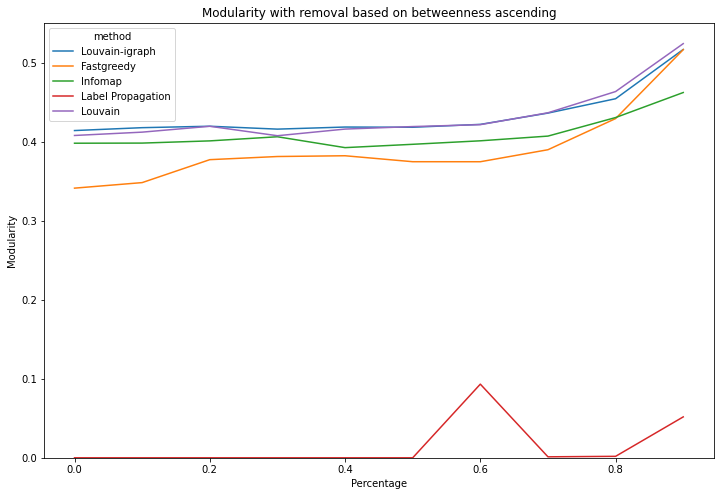

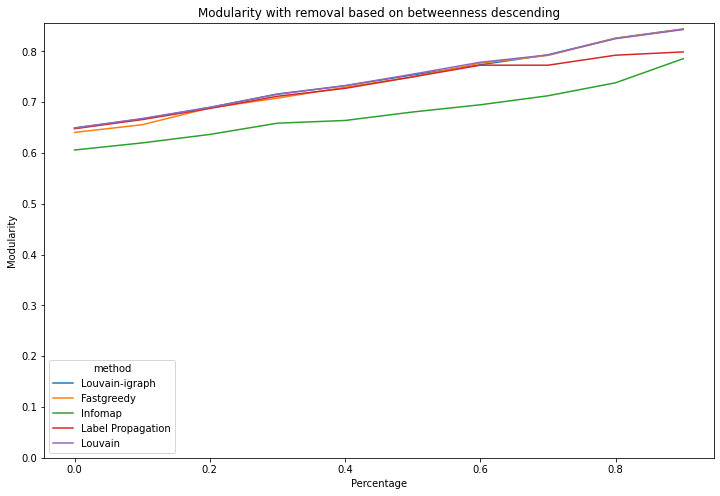

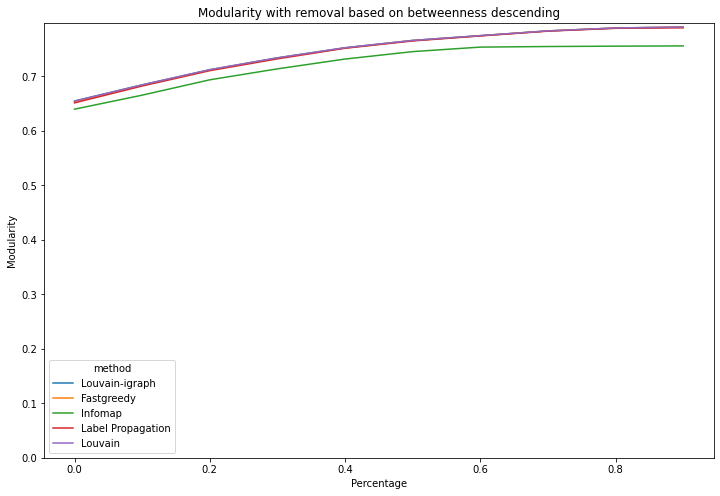

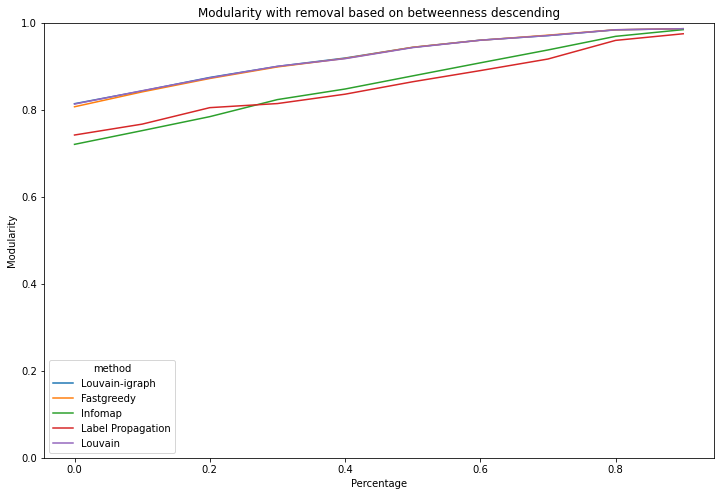

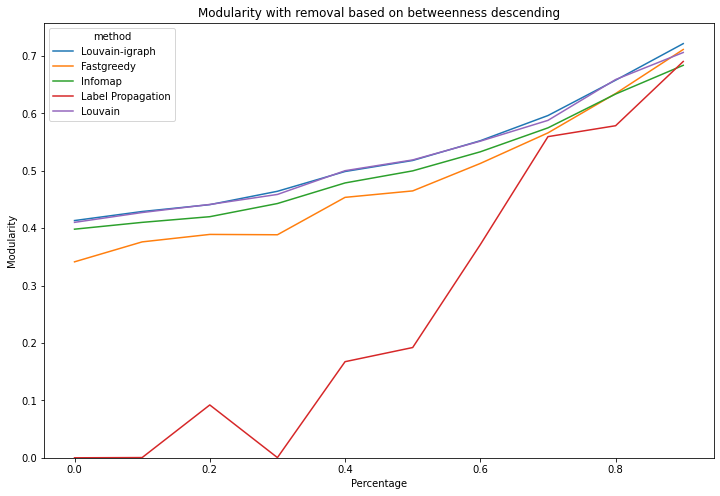

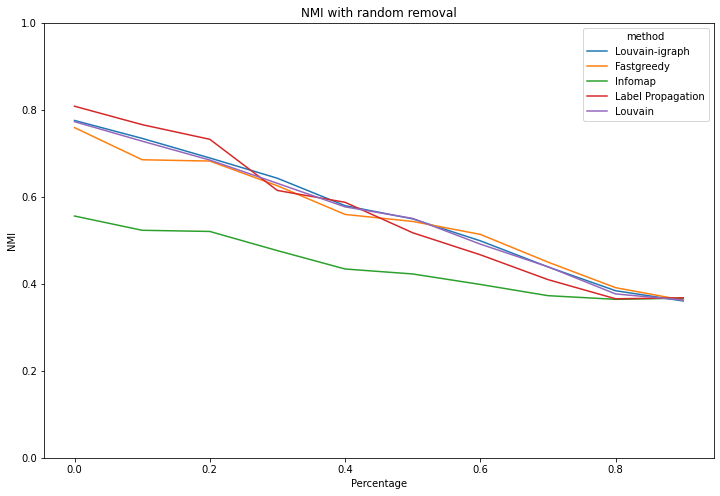

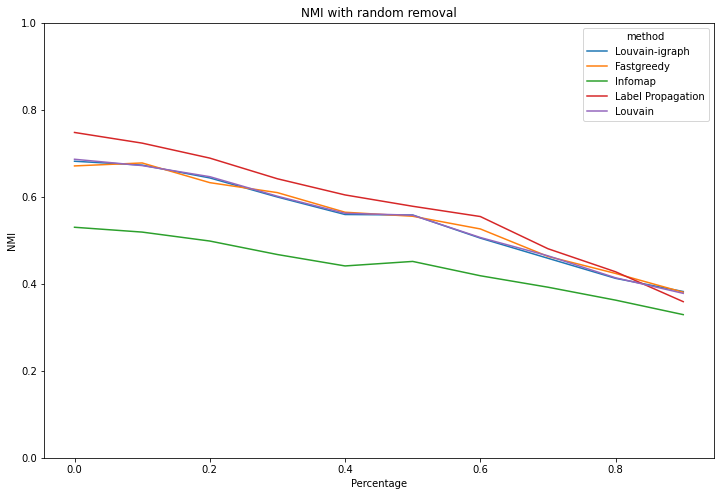

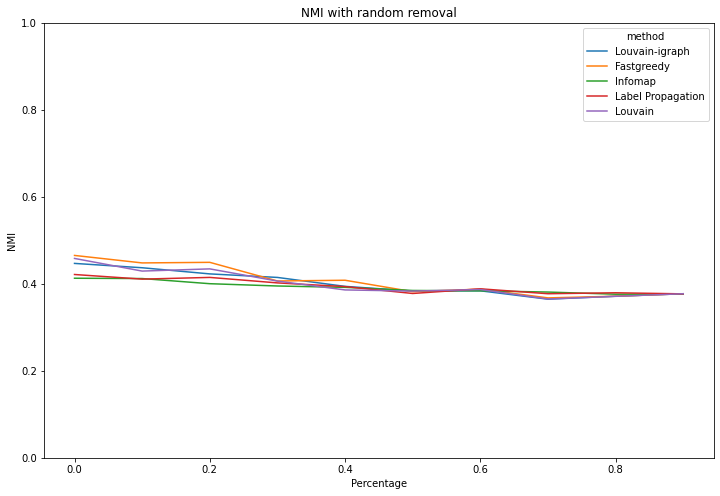

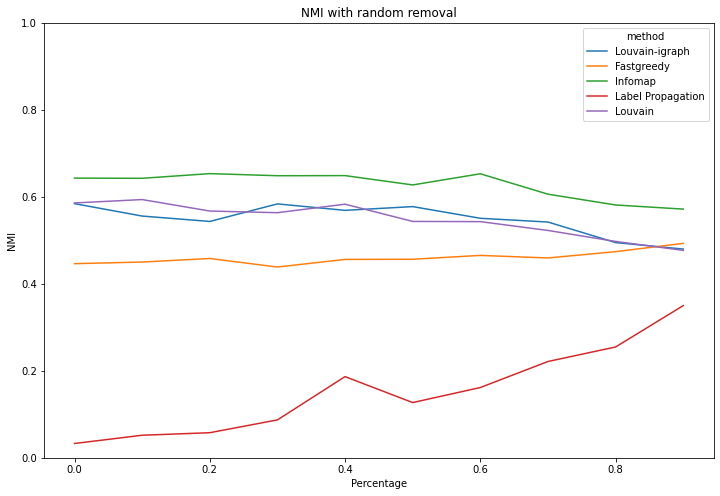

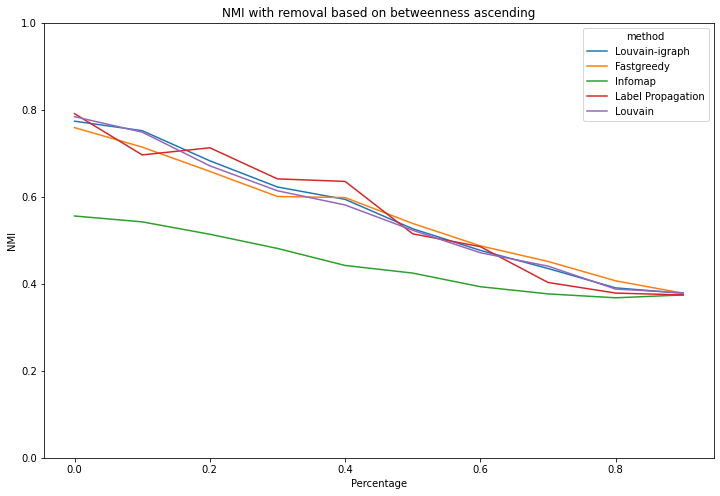

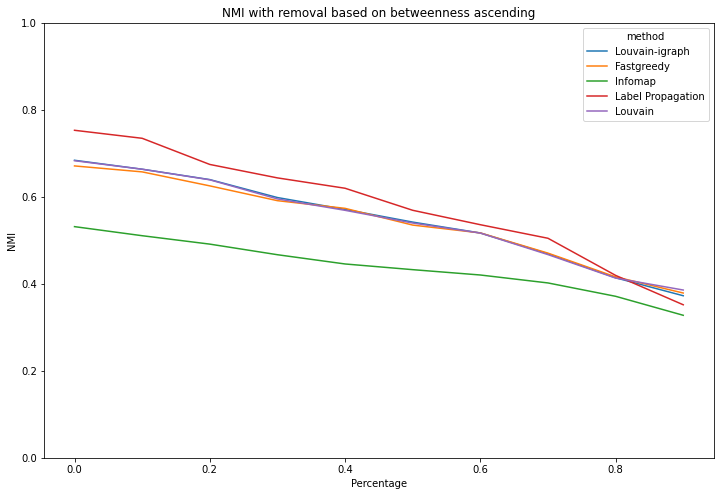

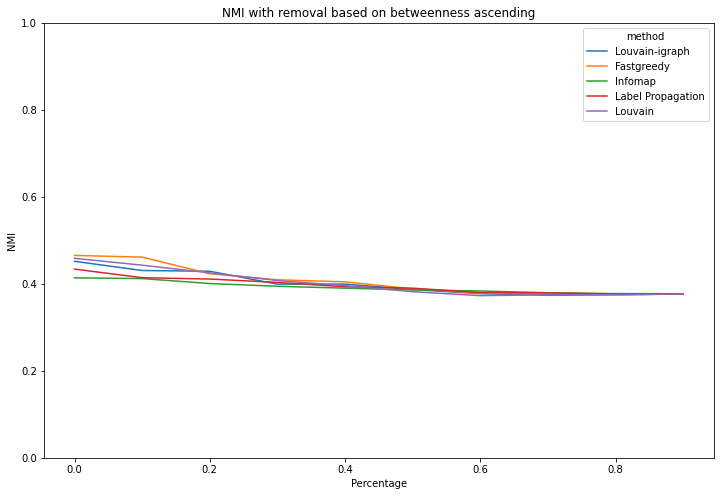

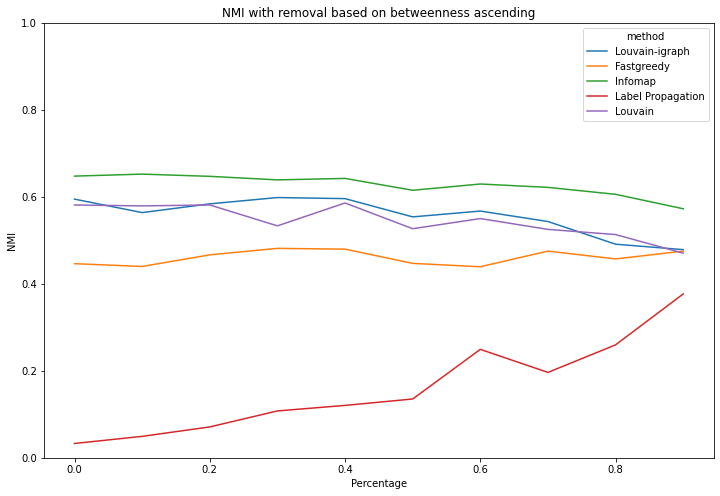

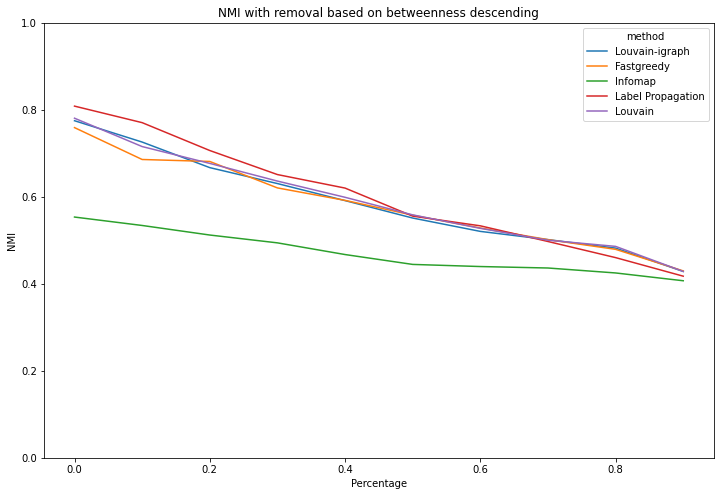

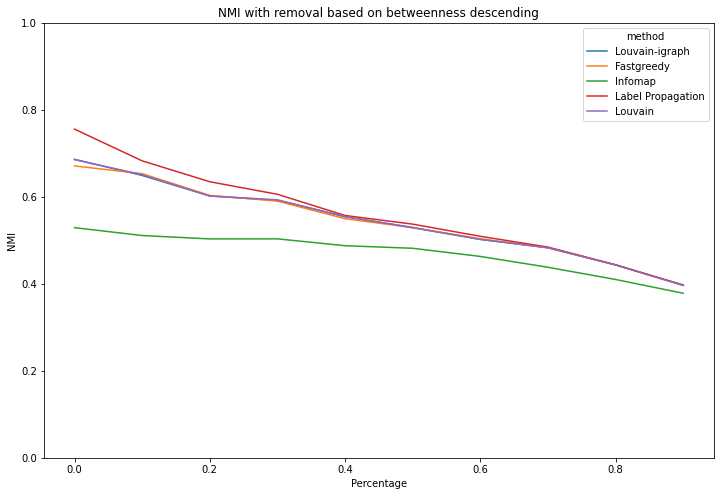

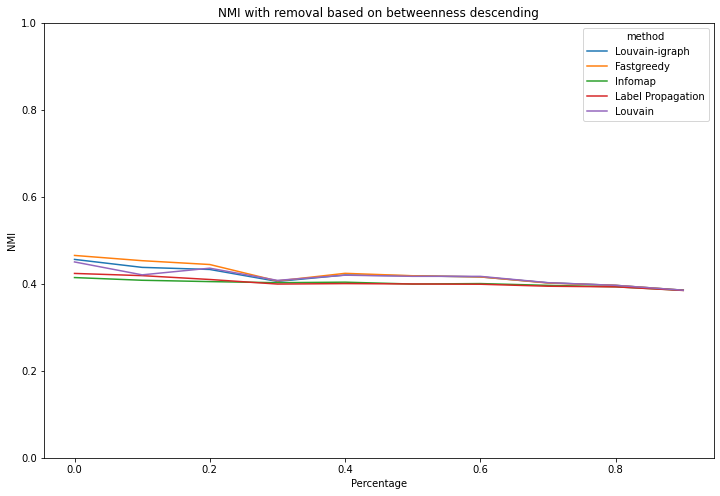

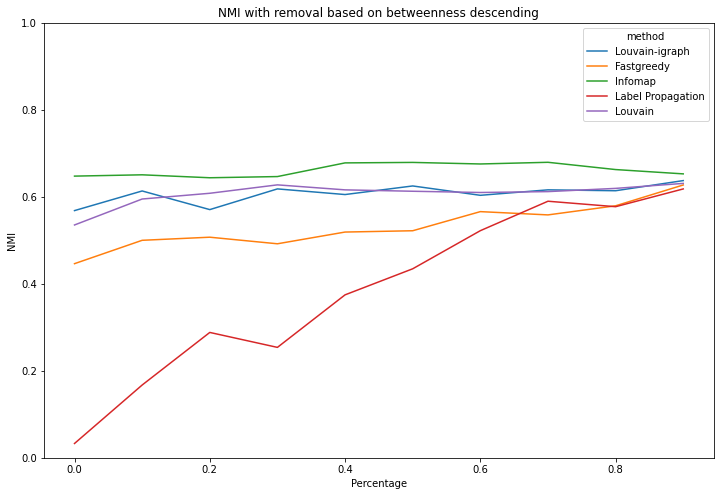

In [12]:
# This for cycle is for saving images
results_folder = 'results_graphs/'


for metric in results['metric'].unique():
    for modification in results['modification'].unique():
        for dataset in results['dataset'].unique():
            fig, ax = plt.subplots(ncols=1, figsize=(12,8))
            data = results[(results['metric'] == metric) &
                           (results['modification'] == modification) &
                           (results['dataset'] == dataset)]
            sns.lineplot(data=data, x='percentage', y='value', hue='method',ax=ax)
            
            ax.set_ylabel(metric)
            ax.set_xlabel('Percentage')
            
            if metric == 'NMI':
                ax.set_ybound(upper=1, lower=0)
            else:
                ax.set_ybound(lower=0)
            
            if modification == 'random asc':
                ax.set_title(metric+' with random removal')
            elif modification == 'betweenness asc':
                ax.set_title(metric+' with removal based on betweenness ascending')
            elif modification == 'betweenness desc':
                ax.set_title(metric+' with removal based on betweenness descending')

            filename = dataset+'_'+modification+'_'+metric+'.png'
            filename = filename.replace(' ','_').replace('*/','t-').lower()
            
            plt.savefig(results_folder+filename)

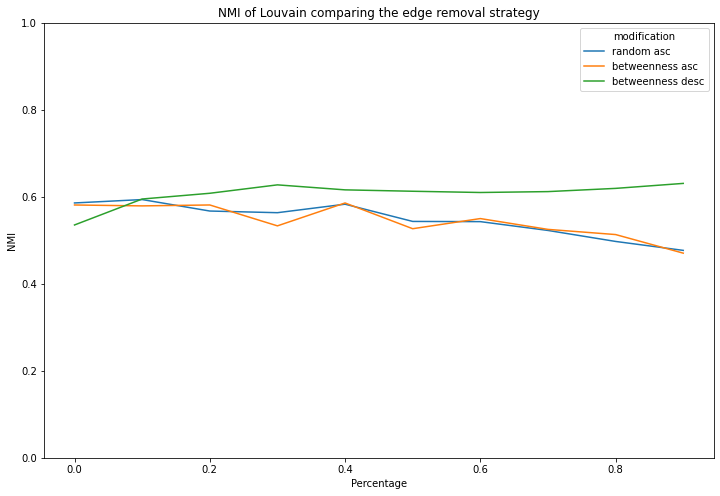

In [6]:
fig, ax = plt.subplots(ncols=1, figsize=(12,8))
data = results[(results['metric'] == 'NMI') &
               (results['method'] == 'Louvain') &
               (results['dataset'] == 'Email EU')]
sns.lineplot(data=data, x='percentage', y='value', hue='modification',ax=ax)

ax.set_ylabel(metric)
ax.set_xlabel('Percentage')
ax.set_ybound(upper=1, lower=0)
ax.set_title('NMI of Louvain comparing the edge removal strategy')

plt.show()

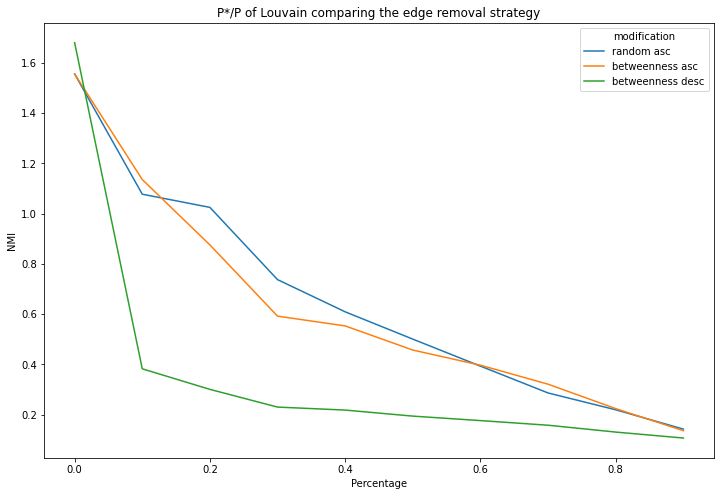

In [8]:
fig, ax = plt.subplots(ncols=1, figsize=(12,8))
data = results[(results['metric'] == 'P*/P') &
               (results['method'] == 'Louvain') &
               (results['dataset'] == 'Email EU')]
sns.lineplot(data=data, x='percentage', y='value', hue='modification',ax=ax)

ax.set_ylabel(metric)
ax.set_xlabel('Percentage')
#ax.set_ybound(upper=1, lower=0)
ax.set_title('P*/P of Louvain comparing the edge removal strategy')

plt.show()

In [27]:
results['modification'].unique()

array(['random asc', 'betweenness asc', 'betweenness desc'], dtype=object)

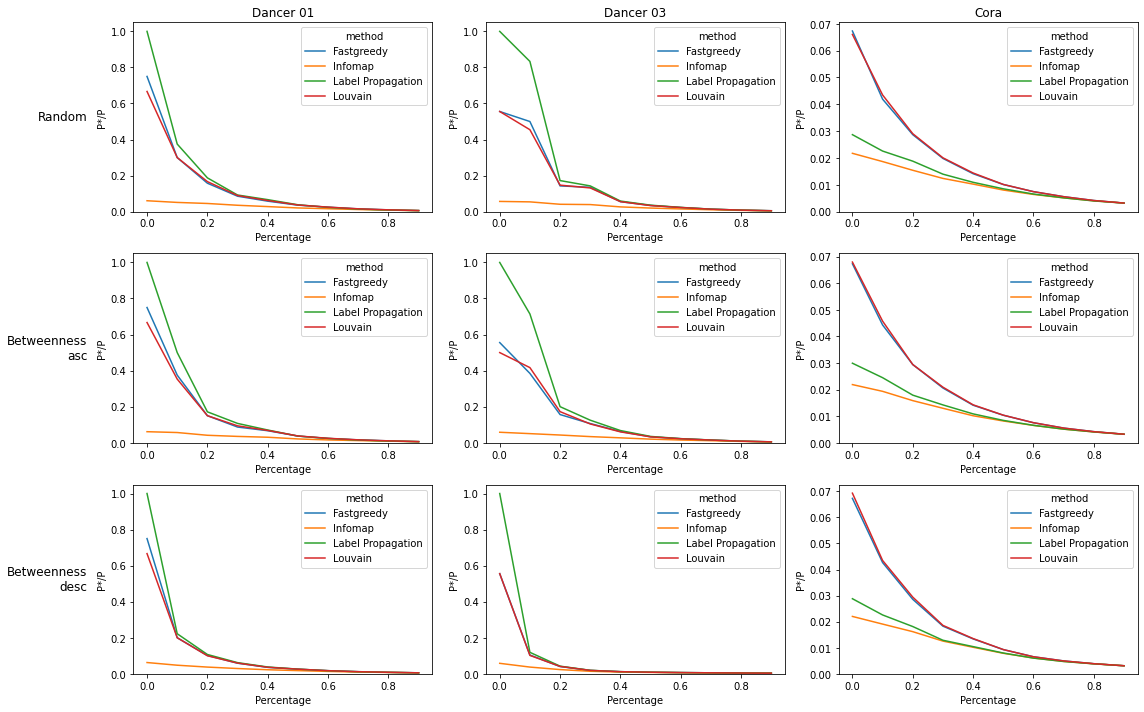

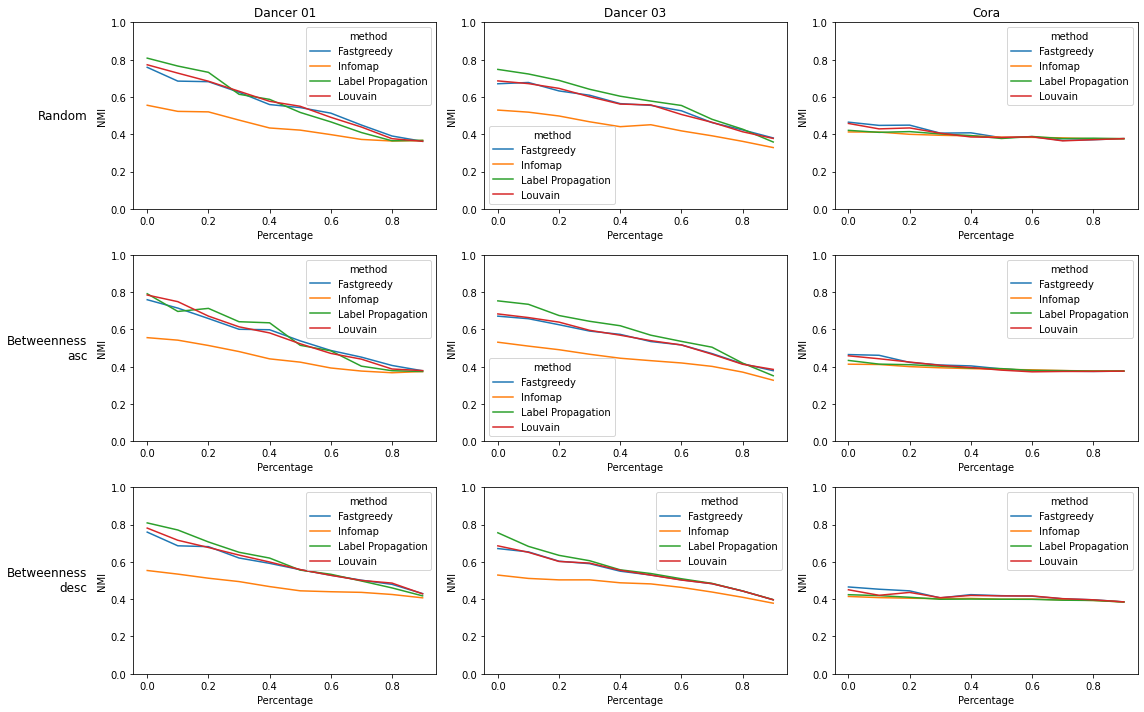

In [50]:
# This for cycle is for saving images
results_folder = 'combined_results/'

space = 0.2

for metric in ['P*/P', 'NMI']:
    fig, ax = plt.subplots(ncols=3, nrows=3,figsize=(16,10))
    plt.subplots_adjust(wspace=space, hspace=space)
    j = 0
    for modification in results['modification'].unique():
        i = 0
        for dataset in ['Dancer 01', 'Dancer 03', 'Cora']:
            c_ax = ax[j][i]
            
            if j == 0:
                c_ax.set_title(dataset)
            
            if i == 0:
                if modification == 'betweenness asc':
                    y_label = 'Betweenness\nasc'
                elif modification == 'betweenness desc':
                    y_label = 'Betweenness\ndesc'
                else:
                    y_label = 'Random'
                
                
                c_ax.annotate(y_label, xy=(0, 0.5), xytext=(-c_ax.yaxis.labelpad - 5, 0),
                xycoords=c_ax.yaxis.label, textcoords='offset points',
                size='large', ha='right', va='center')

            
            data = results[(results['metric'] == metric) &
                           (results['modification'] == modification) &
                           (results['dataset'] == dataset)]
            sns.lineplot(data=data, x='percentage', y='value', hue='method',ax=c_ax)
            
            c_ax.set_ylabel(metric)
            c_ax.set_xlabel('Percentage')
            
            if metric == 'NMI':
                c_ax.set_ybound(upper=1, lower=0)
            else:
                c_ax.set_ybound(lower=0)
            
            i += 1
        j += 1

    fig.tight_layout()
    
    filename = metric+'.png'
    filename = filename.replace(' ','_').replace('*/','t-').lower()

    plt.savefig(results_folder+filename)